# Capstone Project

This notebooke will be mainly used for the capstone project.

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from wordcloud import WordCloud
import folium

import numpy as np
from sklearn.cluster import KMeans

from bs4 import BeautifulSoup

import requests

## Data wrapping
### Get postal codes of munich

In [2]:
url = 'https://www.dasoertliche.de/Themen/Postleitzahlen/M%C3%BCnchen.html'

df = pd.read_html(url, flavor='bs4')[0]
df

,PLZ,Ortsname,Ortsteil,Landkreis,Bundesland
0,80331,München,AltstadtIsarvorstadtLehelLudwigsvorstadt,Stadt München,Bayern
1,80333,München,AltstadtMaxvorstadtSchwabing-West,Stadt München,Bayern
2,80335,München,AltstadtLudwigsvorstadtMaxvorstadtNeuhausen,Stadt München,Bayern
3,80336,München,AltstadtIsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern
4,80337,München,IsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern
...,...,...,...,...,...
89,82024,Taufkirchen Kr München,NaN,München,Bayern
90,99438,Bad Berka,München Stadt Bad Berka,Weimarer Land,Thüringen
91,92275,Hirschbach Oberpf,München Gem. Hirschbach,Amberg-Sulzbach,Bayern
92,94116,Hutthurm,München Gem. Hutthurm,Passau,Bayern


### Check data types

In [3]:
df.dtypes

PLZ            int64
Ortsname      object
Ortsteil      object
Landkreis     object
Bundesland    object
dtype: object

### Translations of column names

|german|english|
|------|-------|
|PLZ|postal code|
|Ortsname|town name|
|Ortsteil|district|
|Landkreis|borough|
|Bundesland|state|

### Select rows
- Select rows inlcuding *Stadt München* in column Landkreis.
- Select rows excluding *München-Flughafen* in column Ortsname.

In [4]:
df = df.loc[df.Landkreis == 'Stadt München'].reset_index(drop=True)
df = df.loc[~(df.Ortsname == 'München-Flughafen')]
df

,PLZ,Ortsname,Ortsteil,Landkreis,Bundesland
0,80331,München,AltstadtIsarvorstadtLehelLudwigsvorstadt,Stadt München,Bayern
1,80333,München,AltstadtMaxvorstadtSchwabing-West,Stadt München,Bayern
2,80335,München,AltstadtLudwigsvorstadtMaxvorstadtNeuhausen,Stadt München,Bayern
3,80336,München,AltstadtIsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern
4,80337,München,IsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern
...,...,...,...,...,...
69,81827,München,PerlachTrudering,Stadt München,Bayern
70,81829,München,Berg am LaimRiemTrudering,Stadt München,Bayern
71,81925,München,Bogenhausen,Stadt München,Bayern
72,81927,München,Bogenhausen,Stadt München,Bayern


### Create new column *location*:

Bundesland + Ortsname + PLZ

In [5]:
df['location'] = df.Bundesland + ', ' + df.Ortsname + ', ' + df.PLZ.astype(str)
df

,PLZ,Ortsname,Ortsteil,Landkreis,Bundesland,location
0,80331,München,AltstadtIsarvorstadtLehelLudwigsvorstadt,Stadt München,Bayern,"Bayern, München, 80331"
1,80333,München,AltstadtMaxvorstadtSchwabing-West,Stadt München,Bayern,"Bayern, München, 80333"
2,80335,München,AltstadtLudwigsvorstadtMaxvorstadtNeuhausen,Stadt München,Bayern,"Bayern, München, 80335"
3,80336,München,AltstadtIsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern,"Bayern, München, 80336"
4,80337,München,IsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern,"Bayern, München, 80337"
...,...,...,...,...,...,...
69,81827,München,PerlachTrudering,Stadt München,Bayern,"Bayern, München, 81827"
70,81829,München,Berg am LaimRiemTrudering,Stadt München,Bayern,"Bayern, München, 81829"
71,81925,München,Bogenhausen,Stadt München,Bayern,"Bayern, München, 81925"
72,81927,München,Bogenhausen,Stadt München,Bayern,"Bayern, München, 81927"


### Geocode

- Latitude
- Longitude

In [6]:
user_agent = 'coursera_capstone_munich'

In [7]:
gdf = gpd.tools.geocode(df.location, provider='nominatim', user_agent=user_agent)
gdf

,geometry,address
0,POINT (11.57345 48.13606),"Altstadt-Lehel, München, Bayern, 80331, Deutsc..."
1,POINT (11.56923 48.14551),"Maxvorstadt, München, Bayern, 80333, Deutschland"
2,POINT (11.55582 48.14572),"Maxvorstadt, München, Bayern, 80335, Deutschland"
3,POINT (11.55672 48.13410),"Ludwigsvorstadt-Isarvorstadt, München, Bayern,..."
4,POINT (11.55795 48.12722),"Ludwigsvorstadt-Isarvorstadt, München, Bayern,..."
...,...,...
69,POINT (11.69318 48.10950),"Trudering-Riem, München, Bayern, 81827, Deutsc..."
70,POINT (11.67781 48.13201),"Trudering-Riem, München, Bayern, 81829, Deutsc..."
71,POINT (11.62170 48.16174),"Bezirksteil Herzogpark, Bogenhausen, München, ..."
72,POINT (11.63748 48.15747),"Bezirksteil Englschalking, Bogenhausen, Münche..."


### Create columns *latitude* and *longitude*

In [8]:
gdf['latitude'] = gdf.geometry.y
gdf['longitude'] = gdf.geometry.x

### Merge df and gdf

In [9]:
df_merge = df.merge(gdf, left_index=True, right_index=True)
df_merge

,PLZ,Ortsname,Ortsteil,Landkreis,Bundesland,location,geometry,address,latitude,longitude
0,80331,München,AltstadtIsarvorstadtLehelLudwigsvorstadt,Stadt München,Bayern,"Bayern, München, 80331",POINT (11.57345 48.13606),"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",48.136058,11.573449
1,80333,München,AltstadtMaxvorstadtSchwabing-West,Stadt München,Bayern,"Bayern, München, 80333",POINT (11.56923 48.14551),"Maxvorstadt, München, Bayern, 80333, Deutschland",48.145510,11.569227
2,80335,München,AltstadtLudwigsvorstadtMaxvorstadtNeuhausen,Stadt München,Bayern,"Bayern, München, 80335",POINT (11.55582 48.14572),"Maxvorstadt, München, Bayern, 80335, Deutschland",48.145724,11.555819
3,80336,München,AltstadtIsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern,"Bayern, München, 80336",POINT (11.55672 48.13410),"Ludwigsvorstadt-Isarvorstadt, München, Bayern,...",48.134098,11.556723
4,80337,München,IsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern,"Bayern, München, 80337",POINT (11.55795 48.12722),"Ludwigsvorstadt-Isarvorstadt, München, Bayern,...",48.127223,11.557946
...,...,...,...,...,...,...,...,...,...,...
69,81827,München,PerlachTrudering,Stadt München,Bayern,"Bayern, München, 81827",POINT (11.69318 48.10950),"Trudering-Riem, München, Bayern, 81827, Deutsc...",48.109498,11.693181
70,81829,München,Berg am LaimRiemTrudering,Stadt München,Bayern,"Bayern, München, 81829",POINT (11.67781 48.13201),"Trudering-Riem, München, Bayern, 81829, Deutsc...",48.132008,11.677808
71,81925,München,Bogenhausen,Stadt München,Bayern,"Bayern, München, 81925",POINT (11.62170 48.16174),"Bezirksteil Herzogpark, Bogenhausen, München, ...",48.161737,11.621705
72,81927,München,Bogenhausen,Stadt München,Bayern,"Bayern, München, 81927",POINT (11.63748 48.15747),"Bezirksteil Englschalking, Bogenhausen, Münche...",48.157465,11.637478


### Save df_merge to data/munich.csv

In [10]:
# for consistency 
# df_merge.to_csv('data/munich.csv', index=False)

### Read data/munich.csv

In [11]:
df_merge = pd.read_csv('data/munich.csv')
df_merge.dtypes

PLZ             int64
Ortsname       object
Ortsteil       object
Landkreis      object
Bundesland     object
location       object
geometry       object
address        object
latitude      float64
longitude     float64
dtype: object

## Create map of Munich
### Get coordinates of Munich

In [12]:
munich = gpd.tools.geocode('munich', user_agent=user_agent)

latitude = munich.geometry.y
longitude = munich.geometry.x

munich

,geometry,address
0,POINT (11.58022 48.13913),"Munich, BY, Germany, Germany"


In [13]:
# create map of Munich using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_merge['latitude'], df_merge['longitude'], df_merge['address']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

## Fousquare API
### Read credentials

In [14]:
import yaml

with open('.credentials.yaml', 'r') as creds:
    credentials = yaml.safe_load(creds)
    
CLIENT_ID = credentials['foursquare']['client_id']
CLIENT_SECRET = credentials['foursquare']['client_secret']
VERSION = '20210320' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

### Explore districts

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
munich_venues = getNearbyVenues(names=df_merge['address'],
                                   latitudes=df_merge['latitude'],
                                   longitudes=df_merge['longitude']
                                  )

Altstadt-Lehel, München, Bayern, 80331, Deutschland
Maxvorstadt, München, Bayern, 80333, Deutschland
Maxvorstadt, München, Bayern, 80335, Deutschland
Ludwigsvorstadt-Isarvorstadt, München, Bayern, 80336, Deutschland
Ludwigsvorstadt-Isarvorstadt, München, Bayern, 80337, Deutschland
Schwanthalerhöhe, München, Bayern, 80339, Deutschland
Ludwigsvorstadt-Isarvorstadt, München, Bayern, 80469, Deutschland
Altstadt-Lehel, München, Bayern, 80538, Deutschland
Maxvorstadt, München, Bayern, 80539, Deutschland
Neuhausen-Nymphenburg, München, Bayern, 80634, Deutschland
Neuhausen-Nymphenburg, München, Bayern, 80636, Deutschland
Neuhausen-Nymphenburg, München, Bayern, 80637, Deutschland
Neuhausen-Nymphenburg, München, Bayern, 80638, Deutschland
Neuhausen-Nymphenburg, München, Bayern, 80639, Deutschland
Laim, München, Bayern, 80686, Deutschland
Laim, München, Bayern, 80687, Deutschland
Laim, München, Bayern, 80689, Deutschland
Schwabing-West, München, Bayern, 80796, Deutschland
Schwabing-West, München,

In [17]:
munich_venues.shape

(1769, 7)

In [18]:
munich_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",48.136057,11.573444,Marienplatz,48.137132,11.575992,Plaza
1,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",48.136057,11.573444,Kustermann,48.136242,11.574897,Department Store
2,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",48.136057,11.573444,St. Peter,48.136530,11.575615,Church
3,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",48.136057,11.573444,Rindermarkt,48.136099,11.573915,Plaza
4,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",48.136057,11.573444,Chocolaterie Beluga,48.135750,11.575776,Café


In [19]:
munich_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Altstadt-Lehel, München, Bayern, 80331, Deutschland",100,100,100,100,100,100
"Altstadt-Lehel, München, Bayern, 80538, Deutschland",54,54,54,54,54,54
"Au-Haidhausen, München, Bayern, 81541, Deutschland",22,22,22,22,22,22
"Au-Haidhausen, München, Bayern, 81667, Deutschland",100,100,100,100,100,100
"Berg am Laim, München, Bayern, 81671, Deutschland",6,6,6,6,6,6
...,...,...,...,...,...,...
"Trudering-Riem, München, Bayern, 81827, Deutschland",3,3,3,3,3,3
"Trudering-Riem, München, Bayern, 81829, Deutschland",2,2,2,2,2,2
"Untergiesing-Harlaching, München, Bayern, 81543, Deutschland",23,23,23,23,23,23


### Count unique categories.

In [20]:
print('There are {} uniques categories.'.format(len(munich_venues['Venue Category'].unique())))

There are 238 uniques categories.


### Analyze each Neighbourhood

In [21]:
# one hot encoding
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
munich_onehot['Neighbourhood'] = munich_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.head()

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfall,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio
0,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
munich_grouped = munich_onehot.groupby('Neighbourhood').mean().reset_index()
munich_grouped

,Neighbourhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfall,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio
0,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",0.01,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.01,0.000000,0.000000,0.010000,0.01,0.01,0.0,0.0
1,"Altstadt-Lehel, München, Bayern, 80538, Deutsc...",0.00,0.0,0.0,0.000000,0.0,0.0,0.037037,0.0,0.037037,...,0.0,0.000000,0.00,0.018519,0.018519,0.018519,0.00,0.00,0.0,0.0
2,"Au-Haidhausen, München, Bayern, 81541, Deutsch...",0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.045455,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0
3,"Au-Haidhausen, München, Bayern, 81667, Deutsch...",0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.020000,0.02,0.000000,0.000000,0.020000,0.00,0.00,0.0,0.0
4,"Berg am Laim, München, Bayern, 81671, Deutschland",0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,"Trudering-Riem, München, Bayern, 81827, Deutsc...",0.00,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0
70,"Trudering-Riem, München, Bayern, 81829, Deutsc...",0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0
71,"Untergiesing-Harlaching, München, Bayern, 8154...",0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0
72,"Untergiesing-Harlaching, München, Bayern, 8154...",0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0


In [23]:
munich_grouped.shape

(74, 239)

### Print each neighbourhood along with the top 5 most common venues

In [24]:
num_top_venues = 5

for hood in munich_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altstadt-Lehel, München, Bayern, 80331, Deutschland----
                 venue  freq
0    German Restaurant  0.07
1                 Café  0.06
2                Hotel  0.04
3       Clothing Store  0.04
4  Bavarian Restaurant  0.04


----Altstadt-Lehel, München, Bayern, 80538, Deutschland----
                venue  freq
0  Italian Restaurant  0.09
1   German Restaurant  0.07
2               Hotel  0.06
3  Mexican Restaurant  0.04
4         Pastry Shop  0.04


----Au-Haidhausen, München, Bayern, 81541, Deutschland----
                venue  freq
0               Hotel  0.09
1               Plaza  0.09
2  Italian Restaurant  0.09
3      Ice Cream Shop  0.09
4         Pizza Place  0.05


----Au-Haidhausen, München, Bayern, 81667, Deutschland----
                venue  freq
0  Italian Restaurant  0.09
1                Café  0.08
2                 Bar  0.06
3               Plaza  0.06
4   German Restaurant  0.06


----Berg am Laim, München, Bayern, 81671, Deutschland----
            venue 

#### Function to sort the venues in descending order.

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Create the new dataframe and display the top 10 venues for each neighbourhood

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = munich_grouped['Neighbourhood']

for ind in np.arange(munich_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Altstadt-Lehel, München, Bayern, 80331, Deutsc...",German Restaurant,Café,Hotel,Clothing Store,Bavarian Restaurant,Plaza,Coffee Shop,Church,Gourmet Shop,Cosmetics Shop
1,"Altstadt-Lehel, München, Bayern, 80538, Deutsc...",Italian Restaurant,German Restaurant,Hotel,Mexican Restaurant,Pastry Shop,Art Museum,Park,Asian Restaurant,Plaza,Tram Station
2,"Au-Haidhausen, München, Bayern, 81541, Deutsch...",Hotel,Plaza,Italian Restaurant,Ice Cream Shop,Pizza Place,Park,Beer Garden,Supermarket,Restaurant,Bar
3,"Au-Haidhausen, München, Bayern, 81667, Deutsch...",Italian Restaurant,Café,Bar,Plaza,German Restaurant,Bakery,Indian Restaurant,French Restaurant,Ice Cream Shop,Pub
4,"Berg am Laim, München, Bayern, 81671, Deutschland",Supermarket,Bakery,Bus Stop,Soccer Field,Shipping Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant


## Cluster K-Mean into 5 clusters

In [27]:
# set number of clusters
kclusters = 5

munich_grouped_clustering = munich_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(munich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 3, 0, 1, 0, 1, 1], dtype=int32)

### Create dataframe including cluster label

In [28]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

munich_merged = df_merge

# merge munich_grouped with munich_data to add latitude/longitude for each neighborhood
munich_merged = munich_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='address')

munich_merged.dropna(inplace=True)
munich_merged['Cluster Labels'] = munich_merged['Cluster Labels'].astype('int')

In [29]:
munich_merged.head().style

,PLZ,Ortsname,Ortsteil,Landkreis,Bundesland,location,geometry,address,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,80331,München,AltstadtIsarvorstadtLehelLudwigsvorstadt,Stadt München,Bayern,"Bayern, München, 80331",POINT (11.57344366404696 48.13605694135037),"Altstadt-Lehel, München, Bayern, 80331, Deutschland",48.136057,11.573444,1,German Restaurant,Café,Hotel,Clothing Store,Bavarian Restaurant,Plaza,Coffee Shop,Church,Gourmet Shop,Cosmetics Shop
1,80333,München,AltstadtMaxvorstadtSchwabing-West,Stadt München,Bayern,"Bayern, München, 80333",POINT (11.56922928152168 48.14551362409741),"Maxvorstadt, München, Bayern, 80333, Deutschland",48.145514,11.569229,1,Café,History Museum,Art Museum,Nightclub,Plaza,Bar,Restaurant,Tram Station,Middle Eastern Restaurant,Movie Theater
2,80335,München,AltstadtLudwigsvorstadtMaxvorstadtNeuhausen,Stadt München,Bayern,"Bayern, München, 80335",POINT (11.55581870221503 48.14572403791928),"Maxvorstadt, München, Bayern, 80335, Deutschland",48.145724,11.555819,1,Italian Restaurant,Hotel,Restaurant,Asian Restaurant,Plaza,Café,Beer Garden,Gym / Fitness Center,Indian Restaurant,Indie Movie Theater
3,80336,München,AltstadtIsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern,"Bayern, München, 80336",POINT (11.55672254679923 48.13409790672435),"Ludwigsvorstadt-Isarvorstadt, München, Bayern, 80336, Deutschland",48.134098,11.556723,1,Hotel,Middle Eastern Restaurant,Italian Restaurant,Asian Restaurant,Café,German Restaurant,Spa,Mexican Restaurant,Brewery,Burger Joint
4,80337,München,IsarvorstadtLudwigsvorstadtSendling,Stadt München,Bayern,"Bayern, München, 80337",POINT (11.55794568730417 48.12722339835911),"Ludwigsvorstadt-Isarvorstadt, München, Bayern, 80337, Deutschland",48.127223,11.557946,1,Italian Restaurant,Supermarket,Café,Hotel,Vietnamese Restaurant,Burger Joint,Hostel,Asian Restaurant,Pizza Place,Nightclub


In [62]:
print(munich_merged['Cluster Labels'].value_counts().to_frame().T.to_markdown())

|                |   1 |   0 |   2 |   3 |   4 |
|:---------------|----:|----:|----:|----:|----:|
| Cluster Labels |  35 |  22 |   8 |   8 |   1 |


### Data: Cluster 0

In [69]:
print(munich_merged.loc[munich_merged['Cluster Labels'] == 0, ['PLZ', 'address']].reset_index(drop=True).to_markdown())

|    |   PLZ | address                                                                                                               |
|---:|------:|:----------------------------------------------------------------------------------------------------------------------|
|  0 | 80686 | Laim, München, Bayern, 80686, Deutschland                                                                             |
|  1 | 80804 | Schwabing-West, München, Bayern, 80804, Deutschland                                                                   |
|  2 | 80805 | Bezirksteil Alte Heide - Hirschau, Schwabing-Freimann, München, Bayern, 80805, Deutschland                            |
|  3 | 80807 | München, Bayern, 80807, Deutschland                                                                                   |
|  4 | 80939 | Bezirksteil Freimann, Schwabing-Freimann, München, Bayern, 80939, Deutschland                                         |
|  5 | 80992 | Moosach, München, Bayern, 80992, Deutsch

### Data: Cluster 1

In [70]:
print(munich_merged.loc[munich_merged['Cluster Labels'] == 1, ['PLZ', 'address']].reset_index(drop=True).to_markdown())

|    |   PLZ | address                                                                                 |
|---:|------:|:----------------------------------------------------------------------------------------|
|  0 | 80331 | Altstadt-Lehel, München, Bayern, 80331, Deutschland                                     |
|  1 | 80333 | Maxvorstadt, München, Bayern, 80333, Deutschland                                        |
|  2 | 80335 | Maxvorstadt, München, Bayern, 80335, Deutschland                                        |
|  3 | 80336 | Ludwigsvorstadt-Isarvorstadt, München, Bayern, 80336, Deutschland                       |
|  4 | 80337 | Ludwigsvorstadt-Isarvorstadt, München, Bayern, 80337, Deutschland                       |
|  5 | 80339 | Schwanthalerhöhe, München, Bayern, 80339, Deutschland                                   |
|  6 | 80469 | Ludwigsvorstadt-Isarvorstadt, München, Bayern, 80469, Deutschland                       |
|  7 | 80538 | Altstadt-Lehel, München, Bayern, 80538, 

### Data: Cluster 2

In [71]:
print(munich_merged.loc[munich_merged['Cluster Labels'] == 2, ['PLZ', 'address']].reset_index(drop=True).to_markdown())

|    |   PLZ | address                                                                                           |
|---:|------:|:--------------------------------------------------------------------------------------------------|
|  0 | 80935 | Bezirksteil Hasenbergl-Lerchenau Ost, Feldmoching-Hasenbergl, München, Bayern, 80935, Deutschland |
|  1 | 80937 | Milbertshofen-Am Hart, München, Bayern, 80937, Deutschland                                        |
|  2 | 80997 | Bezirksteil Untermenzing, Allach-Untermenzing, München, Bayern, 80997, Deutschland                |
|  3 | 81247 | Bezirksteil Obermenzing, Pasing-Obermenzing, München, Bayern, 81247, Deutschland                  |
|  4 | 81545 | Untergiesing-Harlaching, München, Bayern, 81545, Deutschland                                      |
|  5 | 81827 | Trudering-Riem, München, Bayern, 81827, Deutschland                                               |
|  6 | 81927 | Bezirksteil Englschalking, Bogenhausen, München, Bayern, 81927, D

### Data: Cluster 3

In [74]:
print(munich_merged.loc[munich_merged['Cluster Labels'] == 3, ['PLZ', 'address']].reset_index(drop=True).to_markdown())

|    |   PLZ | address                                                                                                        |
|---:|------:|:---------------------------------------------------------------------------------------------------------------|
|  0 | 80638 | Neuhausen-Nymphenburg, München, Bayern, 80638, Deutschland                                                     |
|  1 | 80689 | Laim, München, Bayern, 80689, Deutschland                                                                      |
|  2 | 80933 | Bezirksteil Hasenbergl-Lerchenau Ost, Feldmoching-Hasenbergl, München, Bayern, 80933, Deutschland              |
|  3 | 81369 | Bezirksteil Mittersendling, Sendling-Westpark, München, Bayern, 81369, Deutschland                             |
|  4 | 81477 | Bezirksteil Solln, Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln, München, Bayern, 81477, Deutschland |
|  5 | 81671 | Berg am Laim, München, Bayern, 81671, Deutschland                                        

### Data: Cluster 4

In [76]:
print(munich_merged.loc[munich_merged['Cluster Labels'] == 4, ['PLZ', 'address']].reset_index(drop=True).to_markdown())

|    |   PLZ | address                                                                          |
|---:|------:|:---------------------------------------------------------------------------------|
|  0 | 81739 | Bezirksteil Waldperlach, Ramersdorf-Perlach, München, Bayern, 81739, Deutschland |


### Visualize data

In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(munich_merged['latitude'], munich_merged['longitude'], munich_merged['address'], munich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [31]:
munich_merged.head(2).style

,PLZ,Ortsname,Ortsteil,Landkreis,Bundesland,location,geometry,address,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,80331,München,AltstadtIsarvorstadtLehelLudwigsvorstadt,Stadt München,Bayern,"Bayern, München, 80331",POINT (11.57344366404696 48.13605694135037),"Altstadt-Lehel, München, Bayern, 80331, Deutschland",48.136057,11.573444,1,German Restaurant,Café,Hotel,Clothing Store,Bavarian Restaurant,Plaza,Coffee Shop,Church,Gourmet Shop,Cosmetics Shop
1,80333,München,AltstadtMaxvorstadtSchwabing-West,Stadt München,Bayern,"Bayern, München, 80333",POINT (11.56922928152168 48.14551362409741),"Maxvorstadt, München, Bayern, 80333, Deutschland",48.145514,11.569229,1,Café,History Museum,Art Museum,Nightclub,Plaza,Bar,Restaurant,Tram Station,Middle Eastern Restaurant,Movie Theater


In [32]:
features = ['Cluster Labels', '1st Most Common Venue','2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue']

munich_merged.loc[:, features].groupby(['Cluster Labels']).describe()

1st Most Common Venue                                          \
                               count unique                         top freq   
Cluster Labels                                                                 
0                                 22      7                       Hotel    8   
1                                 35     17          Italian Restaurant   10   
2                                  8      5                    Bus Stop    3   
3                                  8      3                 Supermarket    6   
4                                  1      1  Construction & Landscaping    1   

               2nd Most Common Venue                                \
                               count unique               top freq   
Cluster Labels                                                       
0                                 22     14       Supermarket    4   
1                                 35     22              Café    4   
2                                  8      5          Bus Stop    3   
3                                  8      4            Bakery    4   
4                                  1      1  Lottery Retailer    1   

               3rd Most Common Venue                                  \
                               count unique                 top freq   
Cluster Labels                                                         
0                                 22     15         Supermarket    3   
1                                 35     24  Italian Restaurant    7   
2                                  8      7   German Restaurant    2   
3                                  8      7           Drugstore    2   
4                                  1      1              Lawyer    1   

               4th Most Common Venue                                 
                               count unique                top freq  
Cluster Labels                                                       
0                                 22     18        Supermarket    3  
1                                 35     26  German Restaurant    4  
2                                  8      7  Afghan Restaurant    2  
3                                  8      8        Men's Store    1  
4                                  1      1  Afghan Restaurant    1

In [33]:
munich_clustered = munich_grouped
munich_clustered.insert(0, 'Cluster Labels', kmeans.labels_)

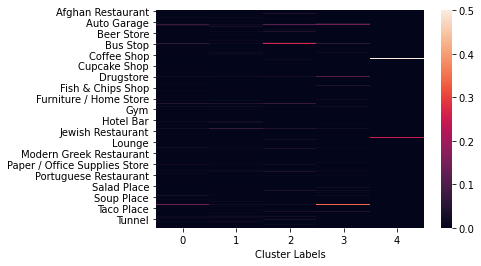

In [34]:
sns.heatmap(munich_clustered.groupby('Cluster Labels').mean().T)

In [35]:
munich_cluster_index = munich_merged.set_index('Cluster Labels')

In [36]:
munich_venues_concat = pd.concat(objs=[
    munich_cluster_index['1st Most Common Venue'],
    munich_cluster_index['2nd Most Common Venue'],
    munich_cluster_index['3rd Most Common Venue'],
    munich_cluster_index['4th Most Common Venue'],
    munich_cluster_index['5th Most Common Venue'],
    munich_cluster_index['6th Most Common Venue'],
    munich_cluster_index['7th Most Common Venue'],
    munich_cluster_index['8th Most Common Venue'],
    munich_cluster_index['9th Most Common Venue'],
    munich_cluster_index['10th Most Common Venue'],
]).to_frame()

In [37]:
munich_venues_concat.loc[1]

,0
Cluster Labels,
1,German Restaurant
1,Café
1,Italian Restaurant
1,Hotel
1,Italian Restaurant
...,...
1,Pub
1,Supermarket
1,Miscellaneous Shop


### Create wordcloud out of venues categories for each clusters label

In [38]:
for i in np.arange(0,5):
    wordcloud = WordCloud().generate(
        munich_venues_concat.loc[i][0].reset_index(drop=True).to_string(index=False, header=False)).to_file('img/cluster_{}.png'.format(i))

#### Cluster 0

![img](img/cluster_0.png)

#### Cluster 1

![img](img/cluster_1.png)

#### Cluster 2

![img](img/cluster_2.png)

#### Cluster 3

![img](img/cluster_3.png)

#### Cluster 4

![img](img/cluster_4.png)